In [63]:
import numpy as np 
import pandas as pd
import Bio
from Bio.pairwise2 import format_alignment
import copy
import Process_SeqLibrary_Finkelsteinlab_new as preprocess
reload(preprocess);
import plotting_Finkelsteinlab_WA as pltData
reload(pltData);
%matplotlib inline 
import matplotlib.pylab as plt 
import seaborn as sns

In [94]:
file_ABA_old = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data_Stijn/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'
data_ABA_old = pd.read_csv(file_ABA_old)
data_ABA_old['sequence'] = data_ABA_old['sequence'].apply(lambda x:x[4:])
data_ABA_old.head()

,sequence,ABA,error,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,GACGCATAAAGATGAGACGCTGG,2.451314,0.120136,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
1,CACGCATAAAGATGAGACGCTGG,2.465621,0.050944,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||||||||.\r...,CGCAGAGTAGAAATACGCAG-\r\n||||||||||||||||||| ...,r:20:C,r,1.0,20
2,CTCGCATAAAGATGAGACGCTGG,2.660628,0.060161,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||..\r...,CGCAGAGTAGAAATACGCAG--\r\n|||||||||||||||||| ...,r:19:T|r:20:C,r,2.0,19|20
3,GACGCATAAAGATGAGACGCTGG,2.531423,0.061229,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
4,GACGCATAAAGATGAGACGCTGG,2.626618,0.052173,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN


In [96]:
OT_ABA = data_ABA_old[data_ABA_old['Mutation ID']=='OT']['ABA'].mean()

In [97]:
data_ABA_old_mean = data_ABA_old.groupby('sequence').mean().reset_index()
data_ABA_old_mean = data_ABA_old_mean[['sequence','ABA']]
data_ABA_old_mean['dABA'] = data_ABA_old_mean['ABA']-OT_ABA
data_ABA_old_mean = data_ABA_old_mean[['sequence','dABA']]
data_ABA_old_mean.head()

,sequence,dABA
0,AAAGCATAAAGATGAGACGCTGG,-0.099558
1,AACACATAAAGATGAGACGCTGG,-0.208390
2,AACCCATAAAGATGAGACGCTGG,0.277758
3,AACGAATAAAGATGAGACGCTGG,0.444683
4,AACGCAAAAAGATGAGACGCTGG,0.754387


In [3]:
file_Nuc_old = '../data_nucleaseq_Finkelsteinlab/targetE/ECas9_cleavage_rate_and_y0_full.csv'
data_Nuc_old = pd.read_csv(file_Nuc_old)
data_Nuc_old.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,TTTAGAGCGTATTTCATGAGACGCTGG,2.657239e-06,6.222793e-24,0.000004,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||.........||\nCG...,CGCAGAGTAGAAA-T--AC-GC-AG\n|||||||| | | | ...,r:10:C|r:11:T|r:12:T|r:13:T|r:14:A|r:15:T|r:16...,r,9.0,10|11|12|13|14|15|16|17|18
1,TTTAGACTGCGATAAAGATGAGACGCTGG,2.767674e-22,1.326366e-25,0.000005,False,TGG,True,2,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,i:16:G|i:18:T,i,2.0,16|18
2,TTTAGACGCATAAAGATGAGACGCCTTAA,1.199120e-06,1.717058e-27,0.000002,False,TAA,False,2,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,i:1:T|i:2:C,i,2.0,1|2
3,TTTAGACGCATAAAGATGAGACGCTAGGA,5.308185e-05,4.825889e-05,0.000069,False,GGA,False,2,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,i:1:A|i:1:T,i,2.0,1|1
4,TTTAGACGTCAGTAAAGATGAGACGCTGG,8.747661e-25,7.856313e-27,0.000001,False,TGG,True,2,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,i:15:G|i:17:T,i,2.0,15|17


In [25]:
data_Nuc_old['sequence'] = data_Nuc_old['Sequence'].apply(lambda x:x[4:])
data_Nuc_old_mean = data_Nuc_old[(data_Nuc_old['Canonical'])&((data_Nuc_old['Mutation Type']=='r')|(data_Nuc_old['Mutation Type']=='OT'))&(data_Nuc_old['Mutation Count']<3)].groupby('sequence').mean().reset_index()
data_Nuc_old_mean = data_Nuc_old_mean[['sequence','cleavage_rate']]

In [27]:
data_Nuc_old_mean.head()

,sequence,cleavage_rate
0,AAAGCATAAAGATGAGACGCTGG,0.086021
1,AACACATAAAGATGAGACGCTGG,0.122193
2,AACCCATAAAGATGAGACGCTGG,0.019252
3,AACGAATAAAGATGAGACGCTGG,0.007815
4,AACGCAAAAAGATGAGACGCTGG,0.006719


In [32]:
file_new = '../CHAMP_and_Nucleaseq_data/TargetE_Cas9.csv'
data_new = pd.read_csv(file_new)
data_new.head()

,sequence,descriptor,wtCas9_dABA,wtCas9_dABA_unc,wtCas9_cleave_rate_log,wtCas9_cleave_rate_log_unc,Cas9_enh_dABA,Cas9_enh_dABA_unc,Cas9_enh_cleave_rate_log,Cas9_enh_cleave_rate_log_unc,...,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,GACGCATAAAGATGAGACGCTGG,Matched,0.000000,0.009956,0.092806,0.075517,0.000000,0.004593,0.034049,0.182273,...,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,NaN
1,AACGCATAAAGATGAGACGCTGG,G20A,-0.074844,0.026124,0.070230,0.083823,-0.004622,0.021022,0.035110,0.169999,...,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||||||||.\nCG...,CGCAGAGTAGAAATACGCAG-\n||||||||||||||||||| \n...,r:20:A,r,1.0,20
2,CACGCATAAAGATGAGACGCTGG,G20C,0.061042,0.020758,0.117449,0.052177,0.007448,0.015059,0.001713,0.092601,...,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||||||||.\nCG...,CGCAGAGTAGAAATACGCAG-\n||||||||||||||||||| \n...,r:20:C,r,1.0,20
3,TACGCATAAAGATGAGACGCTGG,G20T,0.036261,0.025400,0.191607,0.070402,-0.009814,0.016061,0.007715,0.185680,...,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||||||||.\nCG...,CGCAGAGTAGAAATACGCAG-\n||||||||||||||||||| \n...,r:20:T,r,1.0,20
4,GCCGCATAAAGATGAGACGCTGG,A19C,0.112382,0.030107,0.078720,0.083503,0.072123,0.026406,0.000245,0.082473,...,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||.|\nCG...,CGCAGAGTAGAAATACGCA-G\n|||||||||||||||||| |\n...,r:19:C,r,1.0,19


In [38]:
data_new_mean = data_new[(data_new['Canonical'])&((data_new['Mutation Type']=='r')|(data_new['Mutation Type']=='OT'))&(data_new['Mutation Count']<3)].groupby('sequence').mean().reset_index()
data_new_mean = data_new_mean[['sequence','wtCas9_cleave_rate_log','wtCas9_dABA']]
data_new_mean.rename(columns={'wtCas9_cleave_rate_log':'cleavage_rate_new','wtCas9_dABA':'dABA_new'},inplace=True)

In [39]:
data_new_mean.head()

,sequence,cleavage_rate_new,dABA_new
0,AAAGCATAAAGATGAGACGCTGG,0.129794,0.004934
1,AACACATAAAGATGAGACGCTGG,0.158726,-0.033947
2,AACCCATAAAGATGAGACGCTGG,0.044124,0.206339
3,AACGAATAAAGATGAGACGCTGG,0.004864,0.185853
4,AACGCAAAAAGATGAGACGCTGG,0.011590,0.461483


In [67]:
data_Nuc = data_new_mean.merge(data_Nuc_old_mean,on='sequence')[['sequence','cleavage_rate_new','cleavage_rate']]
data_Nuc['log10_cleavage_rate'] = data_Nuc['cleavage_rate'].apply(np.log10)
data_Nuc['log10_cleavage_rate_new'] = data_Nuc['cleavage_rate_new'].apply(np.log10)
data_Nuc.head()

,sequence,cleavage_rate_new,cleavage_rate,log10_cleavage_rate,log10_cleavage_rate_new
0,AAAGCATAAAGATGAGACGCTGG,0.129794,0.086021,-1.065394,-0.886744
1,AACACATAAAGATGAGACGCTGG,0.158726,0.122193,-0.912955,-0.799353
2,AACCCATAAAGATGAGACGCTGG,0.044124,0.019252,-1.715524,-1.355325
3,AACGAATAAAGATGAGACGCTGG,0.004864,0.007815,-2.107069,-2.312999
4,AACGCAAAAAGATGAGACGCTGG,0.011590,0.006719,-2.172664,-1.935934


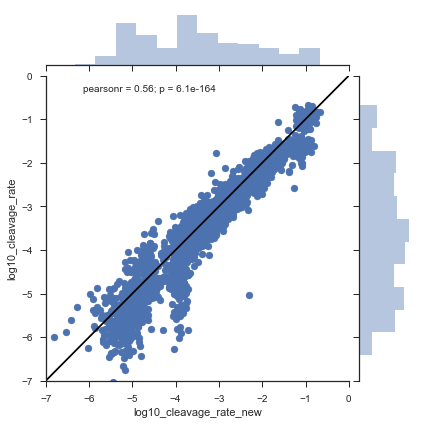

In [84]:
plot = sns.jointplot(x='log10_cleavage_rate_new', y='log10_cleavage_rate',data=data_Nuc,kind="scatter",
              xlim=[-7,0],ylim=[-7,0])
plot.ax_joint.plot([-7,0],[-7,0],'k-')

In [99]:
data_ABA = data_new_mean.merge(data_ABA_old_mean,on='sequence')[['sequence','dABA_new','dABA']]
data_ABA.head()

,sequence,dABA_new,dABA
0,AAAGCATAAAGATGAGACGCTGG,0.004934,-0.099558
1,AACACATAAAGATGAGACGCTGG,-0.033947,-0.208390
2,AACCCATAAAGATGAGACGCTGG,0.206339,0.277758
3,AACGAATAAAGATGAGACGCTGG,0.185853,0.444683
4,AACGCAAAAAGATGAGACGCTGG,0.461483,0.754387


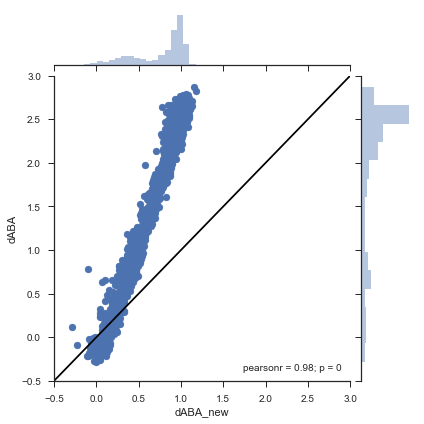

In [103]:
plot = sns.jointplot(x='dABA_new', y='dABA',data=data_ABA,kind="scatter",
              xlim=[-0.5,3],ylim=[-0.5,3])
plot.ax_joint.plot([-0.5,3],[-0.5,3],'k-')